1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1.099399124
1.18670023
1.064523698
1.090923077
1.05682853
1.203956894
1.200144892
1.19747838
1.178302921
1.202112925
1.096344662
1.004385721
1.154520543
1.069062055
1.128905975
1.06
1.031357957
1.02
1.010669266
1
1.083934814
1.063103337
1.012522982
1.011797774
1.1
1.08544654
1.000017489
1.033111217
0.9999999929
1.03039821
[[1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.        ]
 [1.09939912 1.18670023 1.0645237  1.09092308 1.05682853 1.20395689
  1.20014489 1.19747838 1.17830292 1.20211292 1.09634466 1.00438572
  1.15452054 1.06906206 1.12890597]
 [1.06       1.03135796 1.02       1.01066927 1.         1.08393481
  1.06310334 1.01252298 1.01179777 1.1        1.08544654 1.00001749
  1.03311122 0.99999999 1.03039821]]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


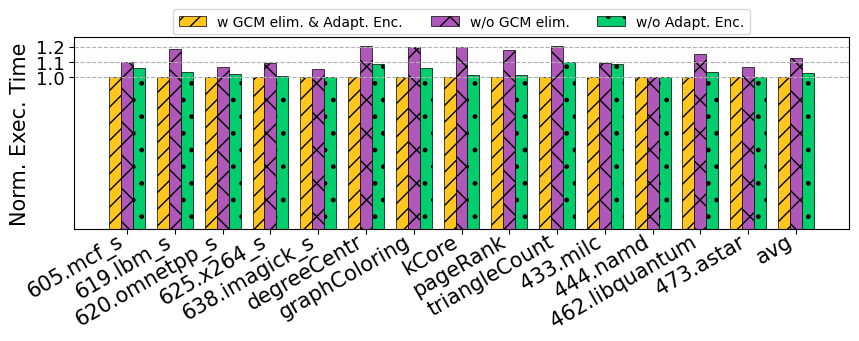

In [11]:
import numpy as np    
import matplotlib.pyplot as plt    
import openpyxl

#bar patterns
patterns = [ "/" , "\\" , "|" , "-" , "+" , "x", "o", "O", ".", "*" ]

N=15
x=np.arange(N) 
xclicks=[
    '605.mcf_s','619.lbm_s','620.omnetpp_s','625.x264_s','638.imagick_s',
    'degreeCentr','graphColoring','kCore','pageRank','triangleCount',
    '433.milc','444.namd','462.libquantum','473.astar','avg'
]
xlabels=''
ylabels='Norm. Exec. Time'
wb = openpyxl.load_workbook(filename="ablation.xlsx")
ws = wb['Sheet1']

b1=np.array([])

for col in ws.iter_cols(min_row=2,min_col=2,values_only=True):
    for value in col:
        # 获取单元格数据
        b1=np.append(b1,value)     
        print(value)            
b1=b1.reshape(3, 15)
print(b1)


allfigsize=(10,2.5)     
width=0.25
plt.figure(figsize=allfigsize)
print(b1[0])
plt.bar(x - width*1, b1[0], width, label='w GCM elim. & Adapt. Enc.', color='#ffc61e',hatch="//", edgecolor='black', linewidth=0.5) 
plt.bar(x , b1[1], width, label='w/o GCM elim.', color='#af58ba', hatch="x", edgecolor='black', linewidth=0.5)
plt.bar(x + width*1, b1[2], width, label='w/o Adapt. Enc.',color='#00cd6c', hatch="." , edgecolor='black', linewidth=0.5)

plt.grid(axis='y',linestyle='--')
plt.xticks(x,xclicks, fontsize=15, rotation=30,ha='right', va='center_baseline') 
#plt.ylim(0,180000)
plt.yticks([1.0,1.1,1.2],fontsize=13)
#plt.xlabel(xlabels,fontsize=15)
plt.ylabel(ylabels,fontsize=15)    
plt.legend(loc='upper center', ncol=3, bbox_to_anchor=(0.50, 1.18), fontsize=10)    
plt.savefig('ablation.pdf',bbox_inches = 'tight')    
plt.show()